In [6]:
#Importing libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
from scipy.stats import zscore #to remove outliers
import requests
import io
import warnings
warnings.filterwarnings('ignore')

In [8]:
#Importing dataset

In [9]:
df = pd.read_csv("abalone.csv")

# eda

In [10]:
df.head(4)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10


In [11]:
df.shape # check the data dimension

(4177, 9)

In [12]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [14]:
df.columns # check the column names for EDA

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [15]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
#Changing categorical data into numeric data

In [22]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['Sex'] = labelencoder.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## handle null values

In [23]:
df.isna().sum() #checked for null values, there are no null values in the dataset

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

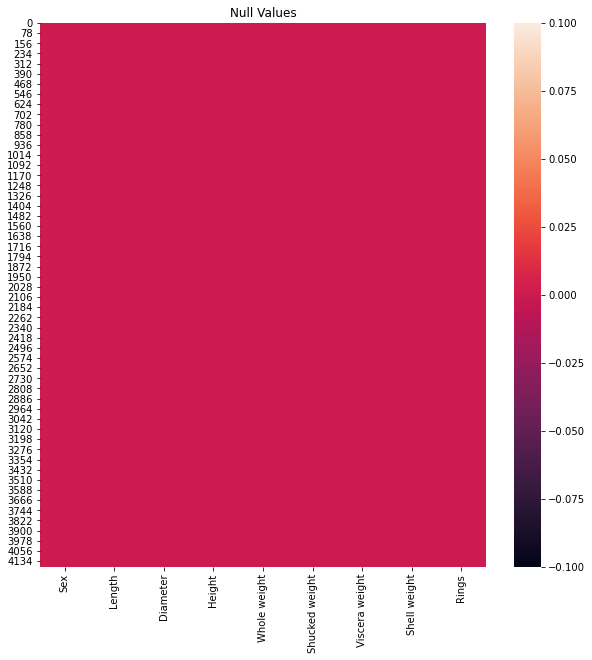

In [24]:
plt.figure(figsize = (10,10))
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

## check for outliers

In [25]:
#remove outliers before skewness check and before x, y split

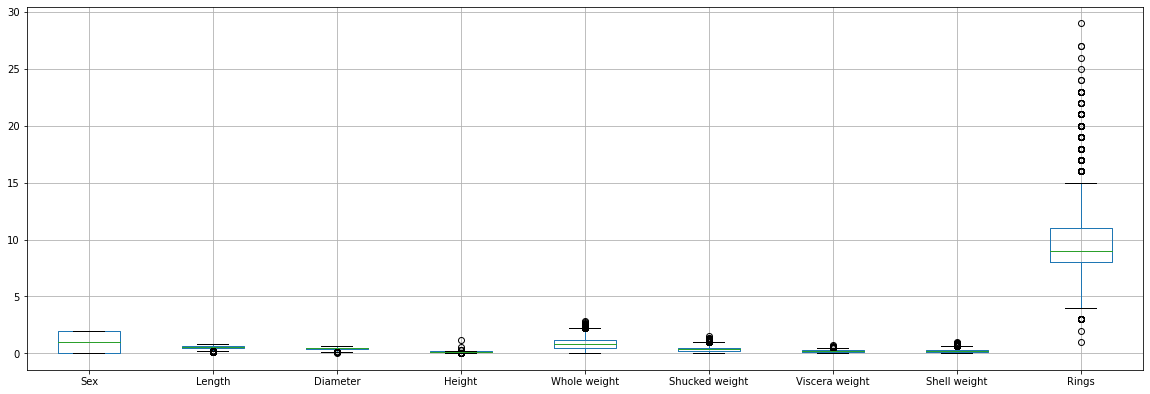

In [26]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [27]:
#Removing outliers by z score

In [28]:
from scipy.stats import zscore
z = np.abs(zscore(df))
new_df = df[(z<3).all(axis=1)]

In [29]:
new_df.shape

(4027, 9)

In [30]:
df.shape

(4177, 9)

In [31]:
dataloss = ((4177-4027)/4177)*100

In [32]:
dataloss

3.5910940866650707

In [35]:
#Outliers can be removed since data loss is less than 7%.
df = new_df

## check co-relation

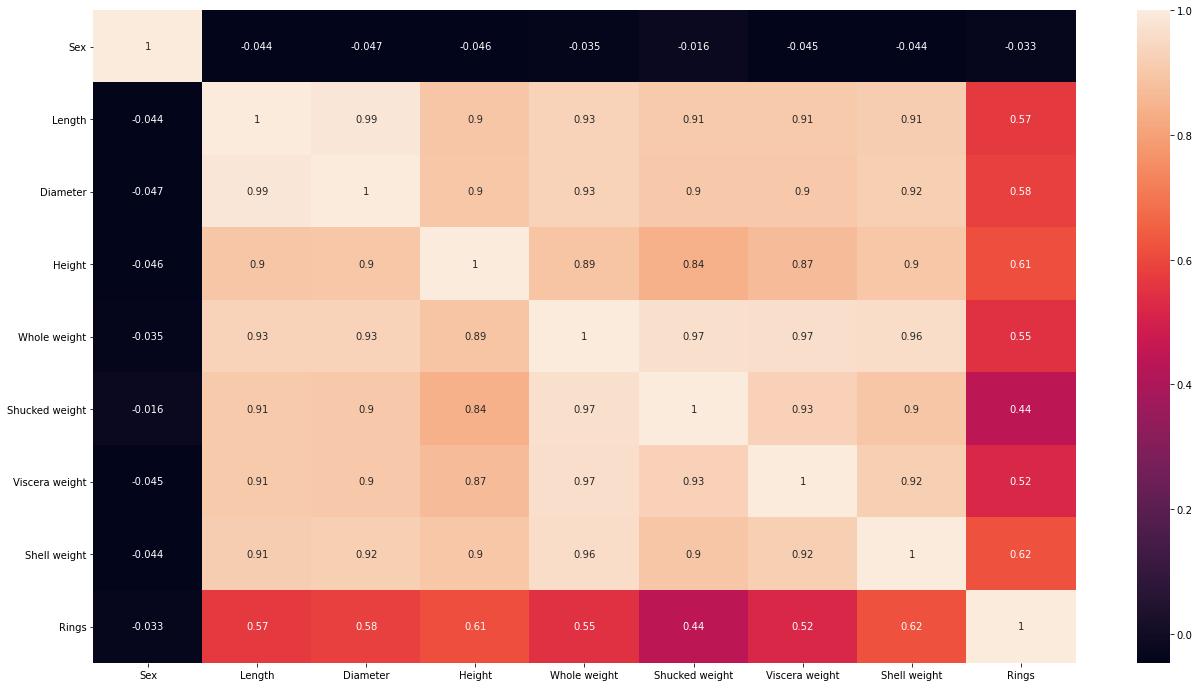

In [36]:
plt.figure(figsize=[22,12])
cor = df.corr()
sns.heatmap(cor, annot = True)
plt.show()

In [40]:
#Arrange co-relation in descending order. Dropping columns should be the last option to prevent data loss.

In [41]:
cor["Rings"].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.622872
Height            0.612540
Diameter          0.584978
Length            0.567074
Whole weight      0.548295
Viscera weight    0.522917
Shucked weight    0.440424
Sex              -0.033272
Name: Rings, dtype: float64

In [42]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [43]:
columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']

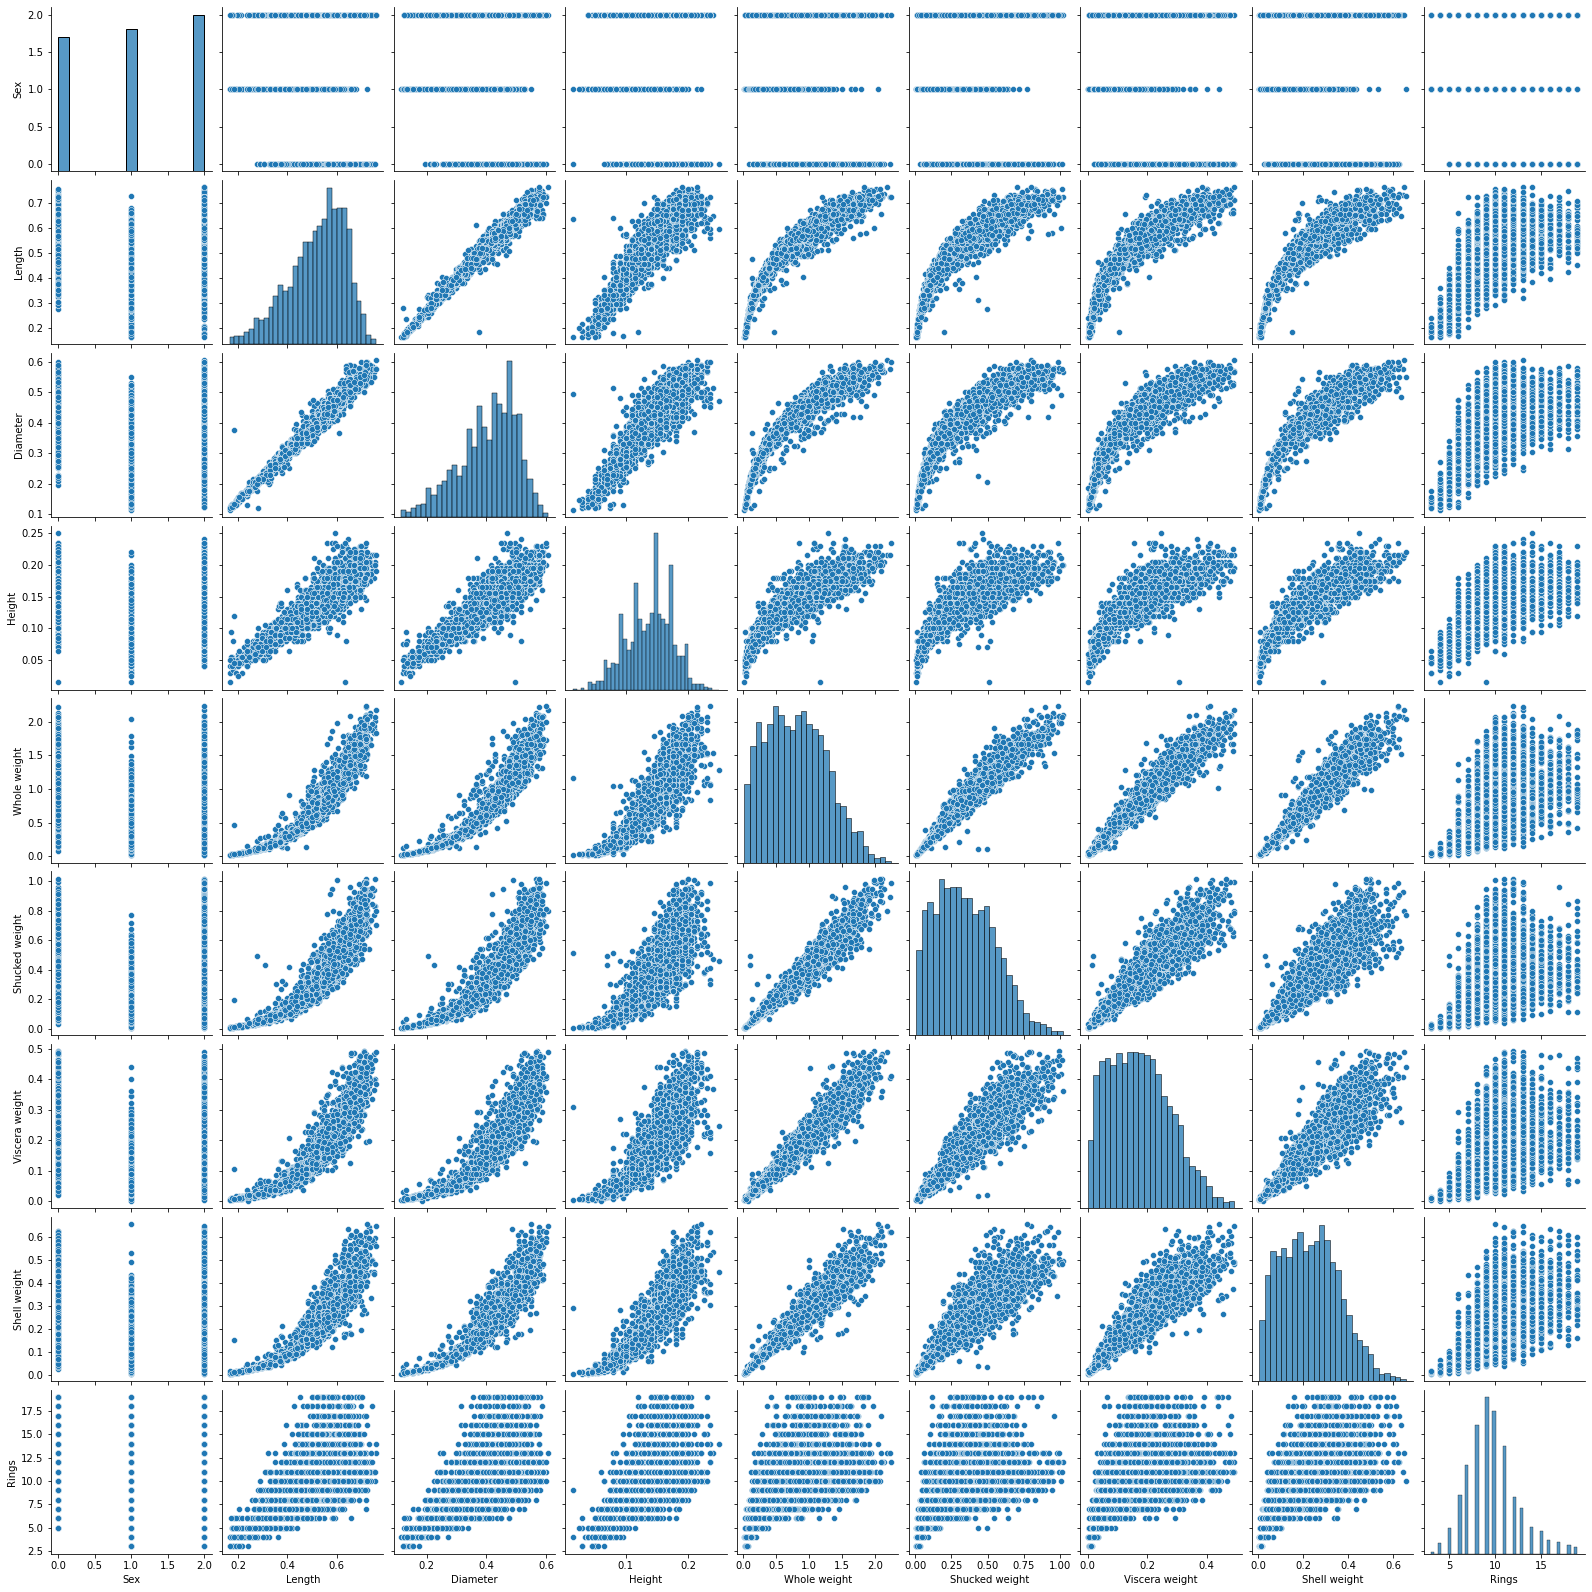

In [44]:
sns.pairplot(df[columns])

## check for skewness

In [45]:
x = df.drop('Rings',axis=1)
y = df['Rings']

In [46]:
x.skew() # check skewness

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
dtype: float64

In [47]:
from sklearn.preprocessing import power_transform
df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns = x.columns)

In [48]:
df_new.skew()

Sex              -0.174523
Length           -0.082985
Diameter         -0.080956
Height           -0.015962
Whole weight     -0.016797
Shucked weight    0.021815
Viscera weight    0.035902
Shell weight      0.016660
dtype: float64

In [49]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4027, dtype: int64

## test train split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

## regression

In [56]:
#Linear Regression

Coefficients: 
 [  0.08370231  -3.22635557  13.7745417   24.55119826   8.1346932
 -18.39695558  -8.00504389   5.28945528]
MAE: 1.4897590312091036
MSE: 4.093859579273324
RMSE: 2.02332883616908
Variance: 0.524268971293042


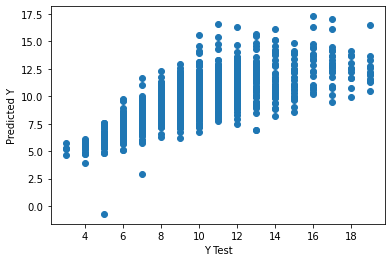

In [58]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)
print('Coefficients: \n', lm.coef_)
predictions = lm.predict(x_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Variance:',metrics.explained_variance_score(y_test, predictions))

In [61]:
#CatBoostRegressor

0:	learn: 2.4878138	total: 174ms	remaining: 1.56s
1:	learn: 2.3215918	total: 178ms	remaining: 712ms
2:	learn: 2.2649295	total: 182ms	remaining: 424ms
3:	learn: 2.2194897	total: 185ms	remaining: 277ms
4:	learn: 2.1572083	total: 187ms	remaining: 187ms
5:	learn: 2.1478575	total: 189ms	remaining: 126ms
6:	learn: 2.1271961	total: 190ms	remaining: 81.5ms
7:	learn: 2.1050330	total: 192ms	remaining: 48ms
8:	learn: 2.0973753	total: 193ms	remaining: 21.5ms
9:	learn: 2.0716638	total: 195ms	remaining: 0us
MAE: 1.5802357941033354
MSE: 4.54369770946195
RMSE: 2.1315951091757435
Variance: 0.47206479526916634


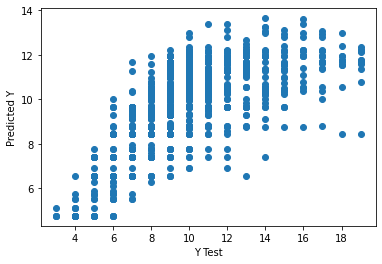

In [60]:
from catboost import CatBoostRegressor
# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=10,learning_rate=0.5,depth=2)
# Fit model
model.fit(x_train,y_train)
# Get predictions
preds = model.predict(x_test)

plt.scatter(y_test,preds)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('Variance:',metrics.explained_variance_score(y_test, preds))

In [59]:
#decisiontreeregressor

MAE: 1.4979088714714919
MSE: 4.285704934410488
RMSE: 2.0701944194713904
Variance: 0.5019794714970327


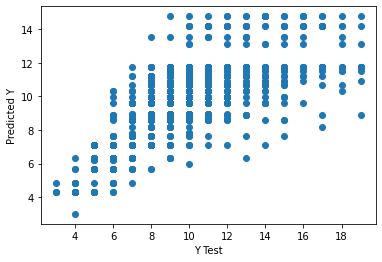

In [64]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x_train,y_train)

# Predict
preds = regr_1.predict(x_test)

# Plot the results
plt.scatter(y_test,preds)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('Variance:',metrics.explained_variance_score(y_test, preds))

## check cross-validation scores

In [66]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x, y, cv=5)
print("CrossValidation Score of LogisticRegression Model: ", scr.mean())

CrossValidation Score of LogisticRegression Model:  0.41480204014861305


In [69]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(regr_1, x, y, cv=5)
print("CrossValidation Score of Decision Tree Model: ", scr.mean())

CrossValidation Score of Decision Tree Model:  0.3807721655540391


In [70]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(model, x, y, cv=5)
print("CrossValidation Score of Catboost Model: ", scr.mean())

0:	learn: 2.2447484	total: 1.38ms	remaining: 12.4ms
1:	learn: 2.0881589	total: 2.55ms	remaining: 10.2ms
2:	learn: 2.0127190	total: 3.52ms	remaining: 8.21ms
3:	learn: 1.9819940	total: 4.7ms	remaining: 7.04ms
4:	learn: 1.9393890	total: 5.72ms	remaining: 5.72ms
5:	learn: 1.9301144	total: 6.68ms	remaining: 4.45ms
6:	learn: 1.9130878	total: 7.65ms	remaining: 3.28ms
7:	learn: 1.9061750	total: 8.6ms	remaining: 2.15ms
8:	learn: 1.9050966	total: 9.56ms	remaining: 1.06ms
9:	learn: 1.8878930	total: 11.8ms	remaining: 0us
0:	learn: 2.6197849	total: 1.73ms	remaining: 15.6ms
1:	learn: 2.4513797	total: 2.82ms	remaining: 11.3ms
2:	learn: 2.3716633	total: 3.8ms	remaining: 8.88ms
3:	learn: 2.3144924	total: 4.79ms	remaining: 7.18ms
4:	learn: 2.2827759	total: 5.87ms	remaining: 5.87ms
5:	learn: 2.2578125	total: 6.92ms	remaining: 4.61ms
6:	learn: 2.2430023	total: 7.92ms	remaining: 3.4ms
7:	learn: 2.2075421	total: 8.94ms	remaining: 2.23ms
8:	learn: 2.1979618	total: 9.95ms	remaining: 1.1ms
9:	learn: 2.1839866	

## hyper parameter tuning

In [83]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs.fit(x_train, y_train)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 5, 'min_samples_split': 50}
4.2445242736311615


In [85]:
new_model = DecisionTreeRegressor(max_depth=5,
                                  min_samples_split=50)
#or new_model = gs.best_estimator_
new_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=50)

## saving the model

In [ ]:
import joblib
joblib.dump(new_model, "model.pkl") #rename as per project name
prediction = new_model.predict(x_test)

## loading the saved model

In [ ]:
model = joblib.load("model.pkl")

In [ ]:
prediction = model.predict(x_test)

In [ ]:
print(accuracy_score(y_test,prediction)*100)

In [ ]:
prediction = pd.DataFrame(prediction) # converting into dataframe

In [ ]:
prediction.to_csv("Results.csv")